In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input

text1_max_words = 10000
text2_max_words = 10000
answer_max_words = 500


In [2]:
text1_input = Input(shape=(None,), dtype='int32', name='text1')
# inputdim,outputdim,inputlength(maxlen):option(flatten할때 필요)
embedded_text1 = layers.Embedding(text1_max_words, 64)(text1_input)
encoded_text1 = layers.LSTM(32)(embedded_text1)


In [3]:
text2_input = Input(shape=(None,), dtype='int32', name='text2')
embedded_text2 = layers.Embedding(text1_max_words, 32)(text2_input)
encoded_text2 = layers.LSTM(16)(embedded_text2)


In [4]:
concatenated = layers.concatenate([encoded_text1, encoded_text2], axis=-1)


In [5]:
import tensorflow as tf
import numpy as np

x = np.arange(10).reshape(2, 5)
print(x, "\n")
y = np.arange(20, 30).reshape(2, 5)
print(y, "\n")

print("axis=0", layers.concatenate([x, y], axis=0), "\n")
print("axis=1", layers.concatenate([x, y], axis=1), "\n")
print("axis=-1", layers.concatenate([x, y], axis=-1))


[[0 1 2 3 4]
 [5 6 7 8 9]] 

[[20 21 22 23 24]
 [25 26 27 28 29]] 

axis=0 tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(4, 5), dtype=int32) 

axis=1 tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int32) 

axis=-1 tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int32)


In [6]:
answer=layers.Dense(answer_max_words, activation='softmax')(concatenated)

In [7]:
model = Model(inputs=[text1_input,text2_input],outputs=answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='acc')

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text1 (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
text2 (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     640000      text1[0][0]                      
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 32)     320000      text2[0][0]                      
_______________________________________________________________________________________

In [9]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# https://gitlab.com/api/v4/projects/4207231/packages/generic/graphviz-releases/6.0.2/windows_10_cmake_Release_graphviz-install-6.0.2-win64.exe

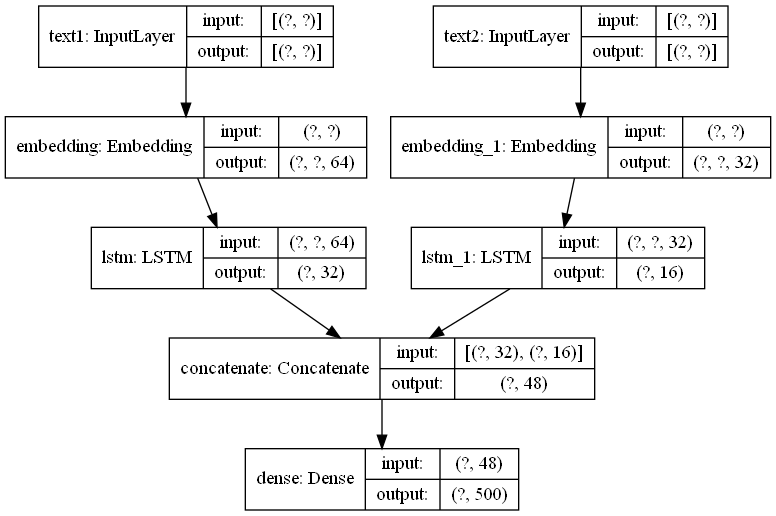

In [11]:
# from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
num_samples=1000
max_len=100

In [16]:
text1 = np.random.randint(low=0, high=text1_max_words, size=(num_samples, 20)) # max_len 대신 20
text2 = np.random.randint(low=0, high=text2_max_words, size=(num_samples, 200)) # max_len 대신 200


In [33]:
answer=np.random.randint(low=0, high=answer_max_words, size=num_samples)
answer=to_categorical(answer)

In [34]:
answer.shape

(1000, 500)

In [38]:
model.fit({'text1':text1,'text2':text2},answer,epochs=50,batch_size=128)

Epoch 1/50
8/8 [==============================] - 1s 68ms/step - loss: 5.3328 - acc: 0.0530
Epoch 2/50
8/8 [==============================] - 0s 62ms/step - loss: 5.2479 - acc: 0.0630
Epoch 3/50
8/8 [==============================] - 0s 54ms/step - loss: 5.1590 - acc: 0.0750
Epoch 4/50
8/8 [==============================] - 0s 55ms/step - loss: 5.0732 - acc: 0.0730
Epoch 5/50
8/8 [==============================] - 0s 52ms/step - loss: 4.9952 - acc: 0.1000
Epoch 6/50
8/8 [==============================] - 0s 51ms/step - loss: 4.9187 - acc: 0.1180
Epoch 7/50
8/8 [==============================] - 0s 51ms/step - loss: 4.8386 - acc: 0.1290
Epoch 8/50
8/8 [==============================] - 0s 54ms/step - loss: 4.7582 - acc: 0.1350
Epoch 9/50
8/8 [==============================] - 0s 53ms/step - loss: 4.6987 - acc: 0.1390
Epoch 10/50
8/8 [==============================] - 0s 53ms/step - loss: 4.6151 - acc: 0.1700
Epoch 11/50
8/8 [==============================] - 0s 56ms/step - loss: 4.5487 

In [48]:
model.evaluate({'text1':text1,'text2':text2},answer)

32/32 [==============================] - 0s 9ms/step - loss: 2.4284 - acc: 0.6570


[2.428433656692505, 0.6570000052452087]

In [39]:
prediction=model.predict({'text1':text1,'text2':text2})
label=np.argmax(prediction[0])
print(label)


373


In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input

max_words = 10000
num_income_groups=10

In [52]:
# posts_input = Input(shape=(None,), dtype='int32', name='posts')
posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(max_words, 256)(posts_input)


In [109]:
x = layers.Conv1D(filters=128, kernel_size=5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=2, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)


In [110]:
pred_age= layers.Dense(1, name='age')(x)
pred_income= layers.Dense(num_income_groups, activation='softmax', name='income')(x)
pred_gender= layers.Dense(1, activation='sigmoid', name='gender')(x)

In [111]:
model=Model(posts_input,[pred_age,pred_income,pred_gender])

In [112]:
# model.compile(optimizer='rmsprop', loss={'age':'mse', 'income':'categorical_crossentropy', 'gender':'binary_crossentropy'})
# model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])
model.compile(optimizer='rmsprop', loss={'age':'mse', 'income':'categorical_crossentropy', 'gender':'binary_crossentropy'}, loss_weights={'age':0.25, 'income':1.0, 'gender':10.0}, metrics=['accuracy'] )
# model.compile(optimizer='rmsprop',loss=['mse','categorical_crossentropy','binary_crossentropy'],loss_weights=[0.25,1.0,10.0])

# categorical_crossentropy -> sparse_categorical_crossentropy

In [113]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 256)    2560000     posts[0][0]                      
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, None, 128)    163968      embedding_3[0][0]                
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, None, 128)    0           conv1d_7[0][0]                   
_______________________________________________________________________________________

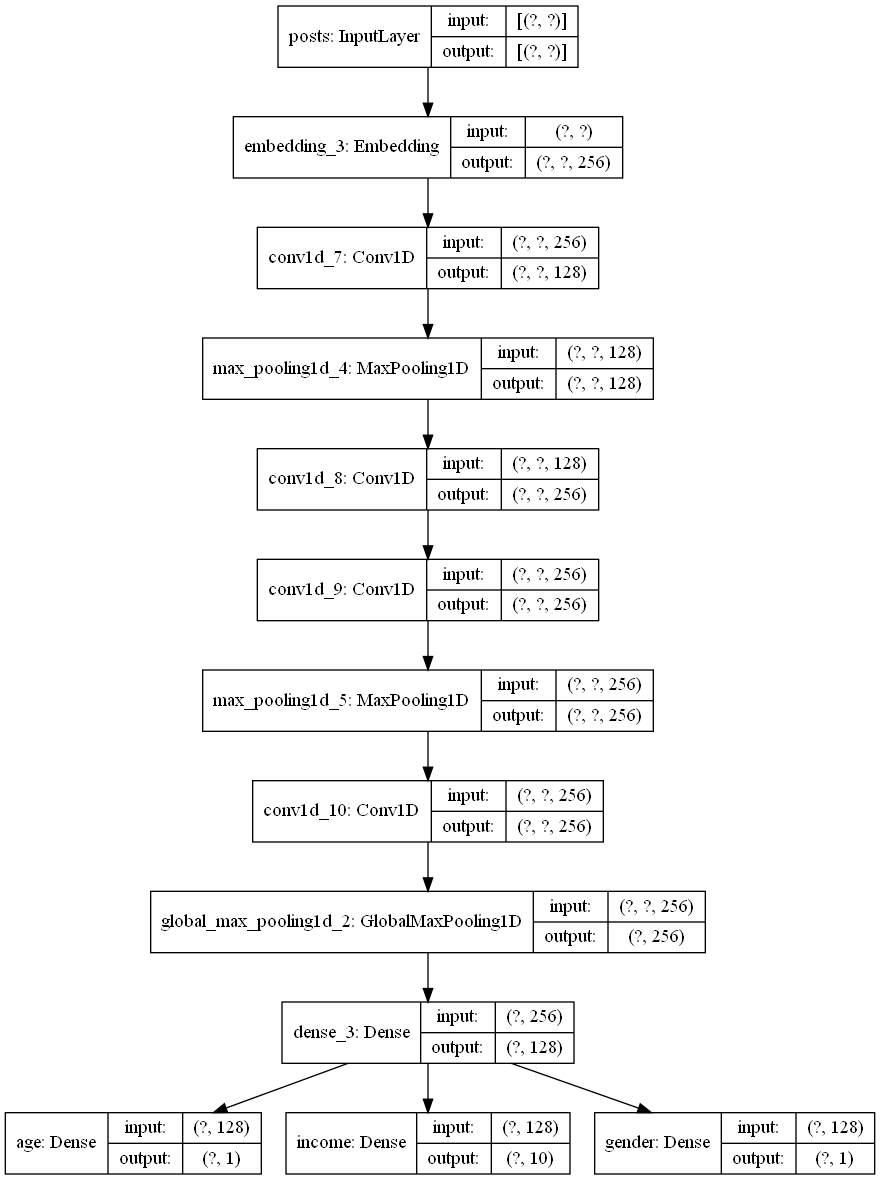

In [114]:
# from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [115]:
import numpy as np
# max_words = 10000
num_samples = 1000
max_len = 100
posts = np.random.randint(low=0, high=max_words, size=(num_samples, max_len))
target_age = np.random.randint(low=0, high=100, size=num_samples)
target_income = np.random.randint(low=0, high=10, size=num_samples)
target_gender = np.random.randint(low=0, high=2, size=num_samples)


In [116]:
y=to_categorical(target_income)

In [118]:
model.fit(posts, [target_age, y, target_gender], epochs=50, batch_size=32)


Epoch 1/50
32/32 [==============================] - 2s 51ms/step - loss: 66.6724 - age_loss: 225.8985 - income_loss: 2.3842 - gender_loss: 0.7814 - age_accuracy: 0.0110 - income_accuracy: 0.0850 - gender_accuracy: 0.4950
Epoch 2/50
32/32 [==============================] - 2s 50ms/step - loss: 53.4371 - age_loss: 171.2231 - income_loss: 2.4112 - gender_loss: 0.8220 - age_accuracy: 0.0110 - income_accuracy: 0.0990 - gender_accuracy: 0.4790
Epoch 3/50
32/32 [==============================] - 2s 53ms/step - loss: 62.2768 - age_loss: 206.7450 - income_loss: 2.3985 - gender_loss: 0.8192 - age_accuracy: 0.0110 - income_accuracy: 0.0980 - gender_accuracy: 0.5030
Epoch 4/50
32/32 [==============================] - 2s 54ms/step - loss: 47.4973 - age_loss: 148.8777 - income_loss: 2.4084 - gender_loss: 0.7869 - age_accuracy: 0.0110 - income_accuracy: 0.1090 - gender_accuracy: 0.4940
Epoch 5/50
32/32 [==============================] - 2s 56ms/step - loss: 47.9969 - age_loss: 149.7413 - income_loss:

In [123]:
text_max_words = 10000
answer_max_words = 200

text_input = Input(shape=(32,), dtype='float32', name='text')
hidden = layers.Embedding(text_max_words, 64)(text_input)
hidden = layers.LSTM(32)(hidden)
hidden = layers.add([hidden, text_input])
print("hiddenshape:", hidden.shape)
print("text_inputshape:", text_input.shape)


hiddenshape: (None, 32)
text_inputshape: (None, 32)


In [128]:
# text_input = Input(shape=(32,), dtype='float32', name='text')
# hidden = layers.Embedding(text_max_words, 64)(text_input)
# hidden.shape

TensorShape([None, 32, 64])

In [125]:
result = layers.Dense(answer_max_words, activation='softmax')(hidden)


In [126]:
model = Model(inputs=text_input, outputs=result)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, 32)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 32, 64)       640000      text[0][0]                       
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 32)           12416       embedding_6[0][0]                
__________________________________________________________________________________________________
add_1 (Add)                     (None, 32)           0           lstm_4[0][0]                     
                                                                 text[0][0]            

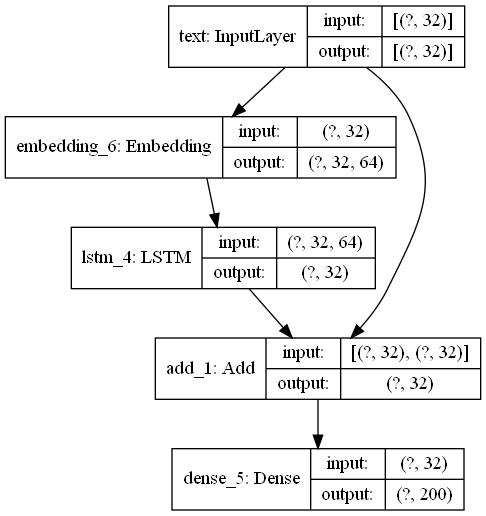

In [127]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [129]:
num_samples = 1000
max_len = 32
inputs = np.random.randint(low=0, high=text_max_words, size=(num_samples, max_len))
result = np.random.randint(low=0, high=answer_max_words, size=num_samples)
result = to_categorical(result)


In [130]:
print("inputs.shape:", inputs.shape)
print("\nresult.shape:", result.shape)
print("\ninputs:", inputs)
print("\nresult:", result)


inputs.shape: (1000, 32)

result.shape: (1000, 200)

inputs: [[1802 8390 1943 ... 4766 3368 7643]
 [3595 1958 7269 ... 8235 6866 8257]
 [7297 3922 6495 ... 2494 6342 7305]
 ...
 [3957   29 5556 ... 5884 3043 7337]
 [9502 7555 7515 ... 1129 9482  809]
 [9878 4195 1359 ... 7266 6768  411]]

result: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


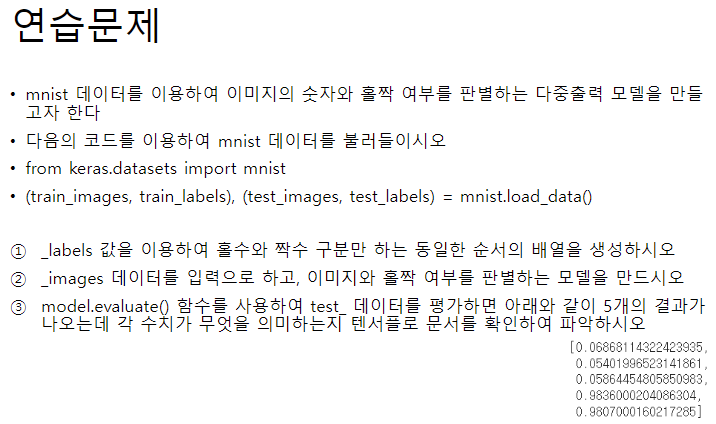

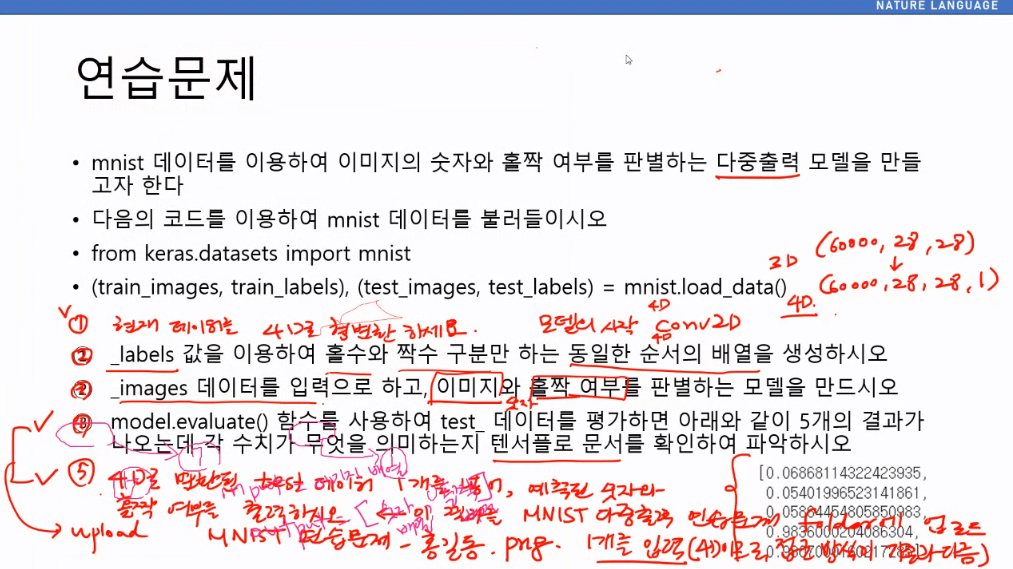

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# train_odd = [1 if n%2==0 else 0 for n in train_labels] # 짝수1, 홀수0
# test_odd = [1 if n%2==0 else 0 for n in test_labels] # 짝수1, 홀수0

In [4]:
train_odd = train_labels%2
test_odd = test_labels%2

In [5]:
# len(train_images),len(odd), len(train_labels)
train_images_4d=np.expand_dims(train_images, axis=-1)
test_images_4d=np.expand_dims(test_images, axis=-1)
train_images_4d.shape

(60000, 28, 28, 1)

In [6]:
# for i in range(len(train_images_4d)):
#     train_images_4d[i][0][0]=odd[i]

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input

input_node = Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(input_node)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(3,3))(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)


In [8]:
# digit
digit = layers.Dense(10, activation='softmax')(x)

# odd, even
oddeven = layers.Dense(1, activation='sigmoid')(x)

In [9]:
model = Model(input_node, [digit, oddeven])
model.compile(optimizer='rmsprop',loss=['sparse_categorical_crossentropy','binary_crossentropy'],metrics='acc')

In [10]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 24, 24, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 8, 8, 64)     0           conv2d_1[0][0]                   
_______________________________________________________________________________________

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [18]:
model.fit(train_images_4d,[train_labels, train_odd],epochs=10, batch_size=128, validation_data=(test_images_4d,[test_labels, test_odd]))

Epoch 1/10
469/469 [==============================] - 56s 120ms/step - loss: 0.5943 - dense_4_loss: 0.4335 - dense_5_loss: 0.1608 - dense_4_acc: 0.9124 - dense_5_acc: 0.9481 - val_loss: 0.0827 - val_dense_4_loss: 0.0554 - val_dense_5_loss: 0.0273 - val_dense_4_acc: 0.9826 - val_dense_5_acc: 0.9908
Epoch 2/10
469/469 [==============================] - 57s 122ms/step - loss: 0.0970 - dense_4_loss: 0.0645 - dense_5_loss: 0.0326 - dense_4_acc: 0.9810 - dense_5_acc: 0.9884 - val_loss: 0.1032 - val_dense_4_loss: 0.0683 - val_dense_5_loss: 0.0349 - val_dense_4_acc: 0.9825 - val_dense_5_acc: 0.9890
Epoch 3/10
469/469 [==============================] - 54s 116ms/step - loss: 0.0674 - dense_4_loss: 0.0451 - dense_5_loss: 0.0223 - dense_4_acc: 0.9869 - dense_5_acc: 0.9926 - val_loss: 0.0903 - val_dense_4_loss: 0.0565 - val_dense_5_loss: 0.0338 - val_dense_4_acc: 0.9840 - val_dense_5_acc: 0.9894
Epoch 4/10
469/469 [==============================] - 54s 114ms/step - loss: 0.0528 - dense_4_loss: 0.0

In [23]:
result = model.evaluate(test_images_4d,[test_labels, test_odd], return_dict=True)
#전체loss, 0-9loss, 홀짝loss, 0-9정확도, 홀짝정확도
result

313/313 [==============================] - 2s 7ms/step - loss: 0.0959 - dense_4_loss: 0.0751 - dense_5_loss: 0.0207 - dense_4_acc: 0.9890 - dense_5_acc: 0.9953


{'loss': 0.09586255997419357,
 'dense_4_loss': 0.07513901591300964,
 'dense_5_loss': 0.020723465830087662,
 'dense_4_acc': 0.9890000224113464,
 'dense_5_acc': 0.9952999949455261}

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model
# Scalar test loss (if the model has a single output and no metrics) or list of scalars (if the model has multiple outputs and/or metrics). The attribute model.metrics_names will give you the display labels for the scalar outputs.

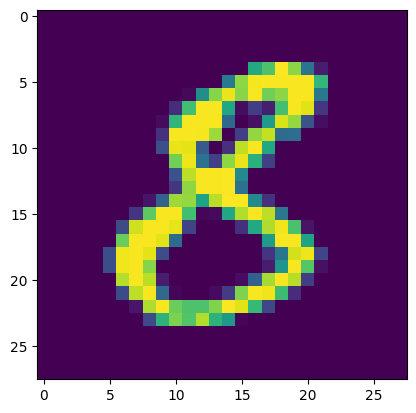

In [18]:
from PIL import Image
from IPython.display import display
from IPython.display import Image as _Imgdis
from matplotlib.colors import Colormap
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

# display(_Imgdis(array_to_img(np.expand_dims(test_images[1234],axis=-1)),width=120,height=120))
# Image.fromarray(test_images[1234]).show()
# %matplotlib inline

img = Image.fromarray(test_images[1234])
plt.imshow(img)
plt.show()

In [11]:
def predict_number(img_array):
    result = model.predict(np.expand_dims(img_array,axis=(0,-1)))
    img = Image.fromarray(img_array)
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    print(f"예측값: {np.argmax(result[0])}")
    if result[1]<0.5:
        print(f"{(1-result[1][0][0])*100:.2f}% 확률로 짝수입니다.")
    else:
        print(f"{(result[1][0][0])*100:.2f}% 확률로 홀수입니다.")

In [13]:
test_images[1234].shape

(28, 28)

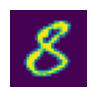

예측값: 8
100.00% 확률로 짝수입니다.


In [101]:
predict_number(test_images[1234])

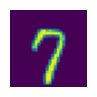

예측값: 7
100.00% 확률로 홀수입니다.


In [102]:
predict_number(test_images[1401])

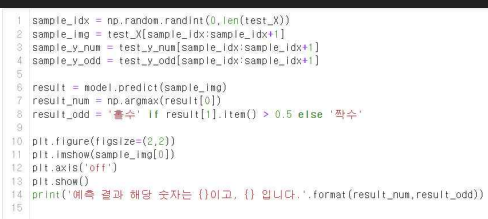